# Import Libraies

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

# Load Dataset

In [2]:
data = pd.read_csv("FuelConsumption.csv")

In [3]:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df = data.copy()

# Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MODELYEAR,1067.0,2014.000000,0.000000,2014.0,2014.00,2014.0,2014.00,2014.0
ENGINESIZE,1067.0,3.346298,1.415895,1.0,2.00,3.4,4.30,8.4
CYLINDERS,1067.0,5.794752,1.797447,3.0,4.00,6.0,8.00,12.0
FUELCONSUMPTION_CITY,1067.0,13.296532,4.101253,4.6,10.25,12.6,15.55,30.2
FUELCONSUMPTION_HWY,1067.0,9.474602,2.794510,4.9,7.50,8.8,10.85,20.5
FUELCONSUMPTION_COMB,1067.0,11.580881,3.485595,4.7,9.00,10.9,13.35,25.8
FUELCONSUMPTION_COMB_MPG,1067.0,26.441425,7.468702,11.0,21.00,26.0,31.00,60.0
CO2EMISSIONS,1067.0,256.228679,63.372304,108.0,207.00,251.0,294.00,488.0


In [8]:
df['MODELYEAR'].value_counts()

2014    1067
Name: MODELYEAR, dtype: int64

In [9]:
# df.drop(['MODELYEAR'],axis = 1,inplace = True) # We can do like this

df.drop(columns = ['MODELYEAR'],inplace = True)

In [10]:
df.head()

,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [11]:
df.select_dtypes('object')

,MAKE,MODEL,VEHICLECLASS,TRANSMISSION,FUELTYPE
0,ACURA,ILX,COMPACT,AS5,Z
1,ACURA,ILX,COMPACT,M6,Z
2,ACURA,ILX HYBRID,COMPACT,AV7,Z
3,ACURA,MDX 4WD,SUV - SMALL,AS6,Z
4,ACURA,RDX AWD,SUV - SMALL,AS6,Z
...,...,...,...,...,...
1062,VOLVO,XC60 AWD,SUV - SMALL,AS6,X
1063,VOLVO,XC60 AWD,SUV - SMALL,AS6,X
1064,VOLVO,XC70 AWD,SUV - SMALL,AS6,X
1065,VOLVO,XC70 AWD,SUV - SMALL,AS6,X


In [12]:
df.select_dtypes('object').columns

Index(['MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE'], dtype='object')

In [13]:
cat_cols = df.select_dtypes('object')

In [14]:
for col in cat_cols:
    count = df[col].value_counts()
    print(count)
    print("=======================")

FORD             90
CHEVROLET        86
BMW              64
MERCEDES-BENZ    59
TOYOTA           49
AUDI             49
GMC              49
PORSCHE          44
VOLKSWAGEN       42
DODGE            39
MINI             36
KIA              33
NISSAN           33
CADILLAC         32
JEEP             31
MAZDA            27
HYUNDAI          24
SUBARU           23
LEXUS            22
JAGUAR           22
HONDA            21
INFINITI         21
LAND ROVER       19
CHRYSLER         19
BUICK            16
MITSUBISHI       16
RAM              13
ACURA            12
LINCOLN          11
VOLVO            11
FIAT             10
SCION             9
BENTLEY           8
ROLLS-ROYCE       7
ASTON MARTIN      7
MASERATI          6
LAMBORGHINI       3
SMART             2
SRT               2
Name: MAKE, dtype: int64
F150 FFV               8
F150 FFV 4X4           8
FOCUS FFV              6
ACCORD                 6
BEETLE                 6
                      ..
CAMRY HYBRID XLE/SE    1
SL 65 AMG           

In [15]:
df.drop(columns = cat_cols,inplace = True)

In [16]:
df

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,24,271
1063,3.2,6,13.2,9.5,11.5,25,264
1064,3.0,6,13.4,9.8,11.8,24,271
1065,3.2,6,12.9,9.3,11.3,25,260


In [17]:
#sns.pairplot(df,hue='CYLINDERS')

In [18]:
df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [19]:
df.corr()[['CO2EMISSIONS']]      #another process df.corr().CO2EMISSIONS

,CO2EMISSIONS
ENGINESIZE,0.874154
CYLINDERS,0.849685
FUELCONSUMPTION_CITY,0.898039
FUELCONSUMPTION_HWY,0.861748
FUELCONSUMPTION_COMB,0.892129
FUELCONSUMPTION_COMB_MPG,-0.906394
CO2EMISSIONS,1.000000


In [20]:
df.corr()[['CO2EMISSIONS']].sort_values(by=['CO2EMISSIONS'],ascending=False)

,CO2EMISSIONS
CO2EMISSIONS,1.000000
FUELCONSUMPTION_CITY,0.898039
FUELCONSUMPTION_COMB,0.892129
ENGINESIZE,0.874154
FUELCONSUMPTION_HWY,0.861748
CYLINDERS,0.849685
FUELCONSUMPTION_COMB_MPG,-0.906394


<AxesSubplot:>

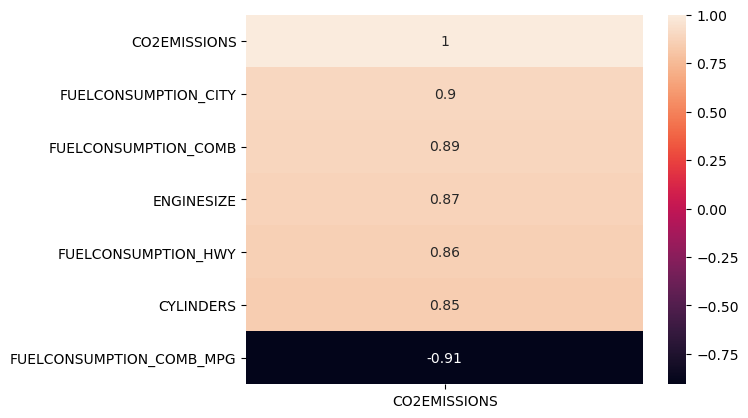

In [21]:
sns.heatmap(df.corr()[['CO2EMISSIONS']].sort_values(by=['CO2EMISSIONS'],ascending=False),annot=True)

# Outliers and Treatment

<AxesSubplot:>

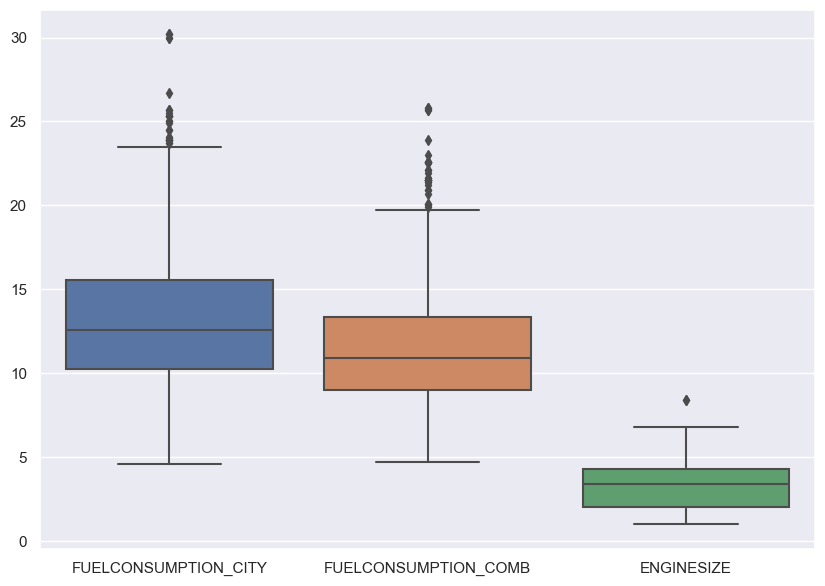

In [22]:
plt.figure(figsize=(10,7))
sns.set(style='darkgrid')
sns.boxplot(data = df[['FUELCONSUMPTION_CITY','FUELCONSUMPTION_COMB','ENGINESIZE']])

<AxesSubplot:>

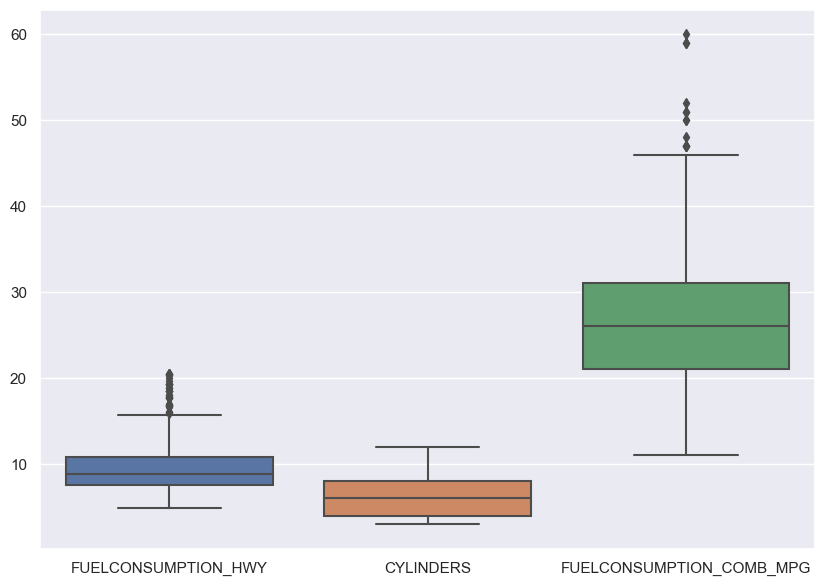

In [23]:
plt.figure(figsize=(10,7))
sns.set(style='darkgrid')
sns.boxplot(data = df[['FUELCONSUMPTION_HWY','CYLINDERS','FUELCONSUMPTION_COMB_MPG']])

In [24]:
q1,q3 = np.quantile(df.ENGINESIZE, .25),np.quantile(df.ENGINESIZE, .75)
q1,q3

(2.0, 4.3)

In [25]:
iqr = q3 - q1
iqr

2.3

In [26]:
lower_outlier = np.where(df.ENGINESIZE < q1 - (1.5*iqr))[0]
lower_outlier

array([], dtype=int64)

In [27]:
upper_outlier = np.where(df.ENGINESIZE > q3 + (1.5*iqr))[0]
upper_outlier 

array([940, 941], dtype=int64)

In [28]:
#df.drop(upper_outlier,inplace = True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ENGINESIZE                1067 non-null   float64
 1   CYLINDERS                 1067 non-null   int64  
 2   FUELCONSUMPTION_CITY      1067 non-null   float64
 3   FUELCONSUMPTION_HWY       1067 non-null   float64
 4   FUELCONSUMPTION_COMB      1067 non-null   float64
 5   FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 6   CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 58.5 KB


### Test code for practice

In [30]:
Q1 = df['FUELCONSUMPTION_CITY'].quantile(0.25)
Q3 = df['FUELCONSUMPTION_CITY'].quantile(0.75)
Q1,Q3

(10.25, 15.55)

In [31]:
IQR = Q3 - Q1
IQR

5.300000000000001

In [32]:
lower_limit = Q1- 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit

(2.299999999999999, 23.5)

In [33]:
outlier = df[(df['FUELCONSUMPTION_CITY']<lower_limit) | (df['FUELCONSUMPTION_CITY']>upper_limit) ]
outlier

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
182,6.2,8,25.7,17.8,22.1,13,354
214,5.3,8,23.7,18.8,21.5,13,344
216,5.3,8,23.9,18.5,21.5,13,344
218,5.3,8,25.3,19.3,22.6,12,362
220,5.3,8,23.9,18.5,21.5,13,344
222,5.3,8,25.3,19.3,22.6,12,362
225,6.0,8,30.0,20.4,25.7,11,411
228,6.0,8,30.2,20.5,25.8,11,413
344,4.6,8,24.1,19.2,21.9,13,350
346,5.4,8,24.9,19.6,22.5,13,360


In [34]:
df[(df['FUELCONSUMPTION_CITY']<lower_limit) | (df['FUELCONSUMPTION_CITY']>upper_limit)].shape

(26, 7)

In [35]:
no_outlier = df[(df['FUELCONSUMPTION_CITY'] > lower_limit) & (df['FUELCONSUMPTION_CITY'] < upper_limit)]
no_outlier

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,24,271
1063,3.2,6,13.2,9.5,11.5,25,264
1064,3.0,6,13.4,9.8,11.8,24,271
1065,3.2,6,12.9,9.3,11.3,25,260


In [36]:
no_outlier.shape

(1039, 7)

### No outlier taking

In [37]:
df = no_outlier
df

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,24,271
1063,3.2,6,13.2,9.5,11.5,25,264
1064,3.0,6,13.4,9.8,11.8,24,271
1065,3.2,6,12.9,9.3,11.3,25,260


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1039 entries, 0 to 1066
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ENGINESIZE                1039 non-null   float64
 1   CYLINDERS                 1039 non-null   int64  
 2   FUELCONSUMPTION_CITY      1039 non-null   float64
 3   FUELCONSUMPTION_HWY       1039 non-null   float64
 4   FUELCONSUMPTION_COMB      1039 non-null   float64
 5   FUELCONSUMPTION_COMB_MPG  1039 non-null   int64  
 6   CO2EMISSIONS              1039 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 64.9 KB


# Outlier Detection and Removal OOP

In [39]:
class OutlierTreatment:
    
    def __init__(self, data):
        self.data = data
        
    def getInfo(self):
        return (self.data.shape)
    
    def outlier(self):
        Q1 = self.data.quantile(0.25)
        Q3 = self.data.quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5*IQR
        upper_limit = Q3 + 1.5*IQR
        return lower_limit, upper_limit
        
    def count_outlier(self, dfa):
        self.lower_limit, self.upper_limit = self.outlier()
        Total_outlier = len(dfa[(self.data <= self.lower_limit)|(self.data >= self.upper_limit)])
        return Total_outlier
    
    def clean_outlier(self, dfa):
        self.lower_limit, self.upper_limit = self.outlier()
        dfx = dfa[(self.data>self.lower_limit)&(self.data<self.upper_limit)]
        return dfx

In [40]:
# ruuning function to each column multiple time until any outlier left
columnslist = ['FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','ENGINESIZE','FUELCONSUMPTION_HWY','CYLINDERS','FUELCONSUMPTION_COMB_MPG']
for i in columnslist:
    while True:
        d = OutlierTreatment(df[i])
        d.getInfo()
        d.outlier()
        d.count_outlier(df)
        if d.count_outlier(df) == 0:
            break
        df = d.clean_outlier(df)
df.shape

(974, 7)

<AxesSubplot:>

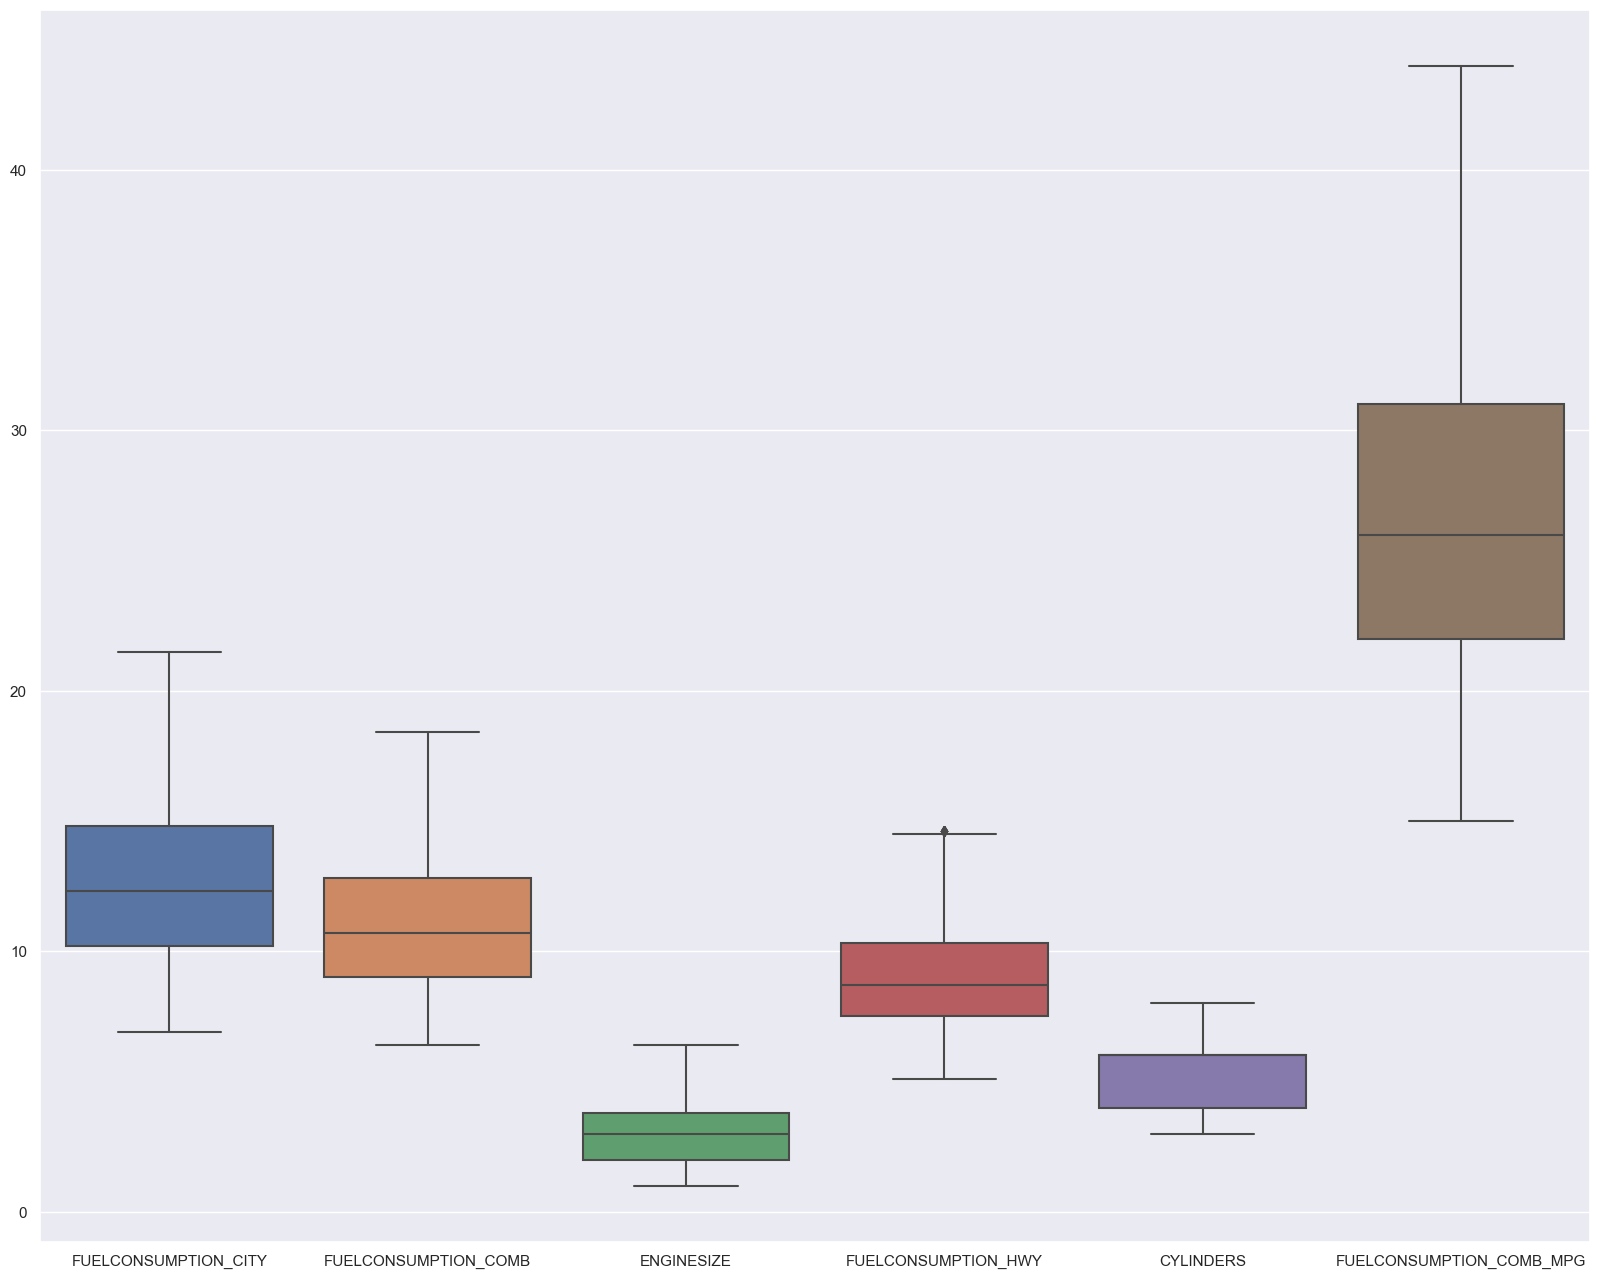

In [41]:
plt.figure(figsize=(20,16))
sns.set(style='darkgrid')
sns.boxplot(data = df[['FUELCONSUMPTION_CITY','FUELCONSUMPTION_COMB','ENGINESIZE','FUELCONSUMPTION_HWY','CYLINDERS','FUELCONSUMPTION_COMB_MPG']])

# Dataset Split

In [42]:
x = df.drop(columns = ['CO2EMISSIONS'])
y = df['CO2EMISSIONS']

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=33)

In [44]:
x_train

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
171,3.0,6,12.8,9.1,11.1,25
795,1.6,4,9.1,6.7,8.0,35
260,1.2,4,7.6,6.0,6.9,41
281,3.6,6,12.5,8.1,10.5,27
86,3.0,6,11.4,7.3,9.6,29
...,...,...,...,...,...,...
732,4.7,8,15.4,10.4,13.2,21
644,3.0,6,14.2,10.2,12.4,23
804,1.6,4,9.3,7.0,8.3,34
437,5.3,8,18.3,14.2,16.5,17


In [45]:
x_test

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
174,6.2,8,16.7,12.5,14.8,19
376,3.7,6,18.8,13.7,16.5,17
166,2.0,4,12.6,8.5,10.8,26
636,2.0,4,13.5,9.9,11.9,24
920,3.6,6,13.3,9.1,11.4,25
...,...,...,...,...,...,...
78,2.0,4,10.2,7.0,8.8,32
1057,2.5,5,11.6,8.3,10.1,28
570,3.2,6,12.3,8.3,10.5,27
234,2.5,4,9.3,6.4,8.0,35


# Fearure Engineering and Selection

In [46]:
from sklearn.feature_selection import mutual_info_regression

In [47]:
scores = mutual_info_regression(x_train,y_train,random_state=33)
scores = pd.DataFrame(scores)
scores.index = x_train.columns
scores.sort_values(by=0,ascending=False)

,0
FUELCONSUMPTION_COMB,4.088892
FUELCONSUMPTION_COMB_MPG,2.908952
FUELCONSUMPTION_CITY,2.138975
FUELCONSUMPTION_HWY,1.587947
ENGINESIZE,0.982349
CYLINDERS,0.651813


# Modeling Simple LinearRegression

### Model building ON FUELCONSUMPTION_COMB

In [48]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [49]:
model.fit(x_train[['FUELCONSUMPTION_COMB']],y_train)

LinearRegression()

In [50]:
model.predict(x_train[['FUELCONSUMPTION_COMB']])

array([249.89422707, 192.94090503, 172.73166172, 238.87100345,
       222.33616802, 288.47550975, 213.15014834, 279.28949007,
       279.28949007, 281.126694  , 187.42929322, 214.98735227,
       268.26626644, 189.26649716, 220.49896408, 323.38238455,
       339.91721998, 213.15014834, 192.94090503, 259.08024676,
       249.89422707, 198.45251684, 314.19636487, 281.126694  ,
       259.08024676, 282.96389794, 238.87100345, 349.10323967,
       216.82455621, 297.66152943, 211.3129444 , 279.28949007,
       330.7312003 , 191.10370109, 231.52218771, 181.91768141,
       286.63830581, 235.19659558, 211.3129444 , 226.01057589,
       249.89422707, 349.10323967, 380.3357066 , 231.52218771,
       253.56863495, 235.19659558, 271.94067432, 249.89422707,
       203.96412865, 292.14991762, 281.126694  , 203.96412865,
       196.6153129 , 207.63853653, 306.84754912, 233.35939164,
       349.10323967, 194.77810897, 227.84777983, 257.24304282,
       213.15014834, 336.24281211, 180.08047747, 350.94

In [51]:
y_train

171    255
795    184
260    159
281    242
86     221
      ... 
732    304
644    285
804    191
437    380
24     214
Name: CO2EMISSIONS, Length: 779, dtype: int64

In [52]:
model.coef_

array([18.37203937])

In [53]:
model.intercept_

45.964590077556835

# Evaluation

In [54]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [55]:
class Metrics:
    def evaluate(self,model,feature,y_train):
        model.fit(feature, y_train)
        y_pred_train_or_test = model.predict(feature)
        mae = mean_absolute_error(y_true = y_train, y_pred = y_pred_train_or_test)
        mse = mean_squared_error(y_true = y_train, y_pred = y_pred_train_or_test)
        r2 = r2_score(y_true = y_train, y_pred = y_pred_train_or_test)*100
        print(f"MAE :: {mae: .4f}")
        print(f"MSE :: {mse: .4f}")
        print(f"R2 :: {r2: .4f}")
        return np.array([mae,mse,r2])

In [56]:
# For Train Data
evaluator = Metrics()

In [57]:
evaluator.evaluate(model,x_train[['FUELCONSUMPTION_COMB']],y_train)

MAE ::  14.1026
MSE ::  549.1554
R2 ::  81.9535


array([ 14.1025897 , 549.15540157,  81.95348403])

In [58]:
# For Test Data
evaluator.evaluate(model,x_test[['FUELCONSUMPTION_COMB']],y_test)

MAE ::  12.8098
MSE ::  510.1954
R2 ::  81.7687


array([ 12.80976888, 510.19535947,  81.76870901])

# Model Visualization

## Visualization By OOP

In [59]:
class visualization:
    def __init__(self,give_x_train,give_y_train,give_dummy_x,give_ypred,give_xlabel):
        self.give_x_train = give_x_train
        self.give_y_train = give_y_train
        self.give_dummy_x = give_dummy_x
        self.give_ypred = ypred
        self.give_xlabel = give_xlabel
        
    def visualize(self):
        plt.figure(figsize=(10,7))
        plt.scatter (self.give_x_train, self.give_y_train,label='Actual')
        plt.plot(self.give_dummy_x, self.give_ypred, label='Regression Line', color='darkorange', linewidth=5) # line plot
        plt.xlabel(self.give_xlabel)
        plt.ylabel("CO2EMISSIONS")
        plt.legend()
        plt.show()
        

### ON FUELCONSUMPTION_COMB

In [60]:
evaluator.evaluate(model,x_train[['FUELCONSUMPTION_COMB']],y_train)

MAE ::  14.1026
MSE ::  549.1554
R2 ::  81.9535


array([ 14.1025897 , 549.15540157,  81.95348403])

In [61]:
x_train[['FUELCONSUMPTION_COMB']].describe().T

,count,mean,std,min,25%,50%,75%,max
FUELCONSUMPTION_COMB,779.0,11.057895,2.719921,6.4,8.9,10.6,12.7,18.4


In [62]:
dummy_x = np.linspace(6.2,19,200)
dummy_x = dummy_x.reshape(-1,1) # -1 = row , 1 = columns
dummy_x

array([[ 6.2       ],
       [ 6.26432161],
       [ 6.32864322],
       [ 6.39296482],
       [ 6.45728643],
       [ 6.52160804],
       [ 6.58592965],
       [ 6.65025126],
       [ 6.71457286],
       [ 6.77889447],
       [ 6.84321608],
       [ 6.90753769],
       [ 6.9718593 ],
       [ 7.0361809 ],
       [ 7.10050251],
       [ 7.16482412],
       [ 7.22914573],
       [ 7.29346734],
       [ 7.35778894],
       [ 7.42211055],
       [ 7.48643216],
       [ 7.55075377],
       [ 7.61507538],
       [ 7.67939698],
       [ 7.74371859],
       [ 7.8080402 ],
       [ 7.87236181],
       [ 7.93668342],
       [ 8.00100503],
       [ 8.06532663],
       [ 8.12964824],
       [ 8.19396985],
       [ 8.25829146],
       [ 8.32261307],
       [ 8.38693467],
       [ 8.45125628],
       [ 8.51557789],
       [ 8.5798995 ],
       [ 8.64422111],
       [ 8.70854271],
       [ 8.77286432],
       [ 8.83718593],
       [ 8.90150754],
       [ 8.96582915],
       [ 9.03015075],
       [ 9

In [63]:
ypred = model.predict(dummy_x)

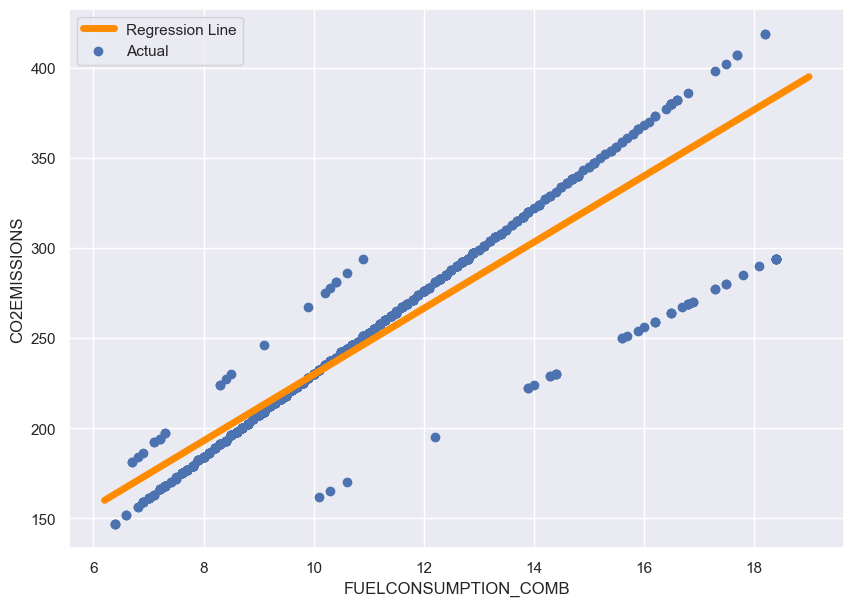

In [64]:
raihan = visualization(x_train[['FUELCONSUMPTION_COMB']],y_train,dummy_x,ypred,"FUELCONSUMPTION_COMB")
raihan.visualize()

### ON ENGINESIZE   

In [65]:
evaluator.evaluate(model,x_train[['ENGINESIZE']],y_train)

MAE ::  21.9097
MSE ::  813.8568
R2 ::  73.2548


array([ 21.90969852, 813.85684094,  73.25478283])

In [66]:
x_train[['ENGINESIZE']].describe().T

,count,mean,std,min,25%,50%,75%,max
ENGINESIZE,779.0,3.1819,1.295372,1.0,2.0,3.0,3.8,6.4


In [67]:
dummy_x = np.linspace(1, 7, 200)
dummy_x = dummy_x.reshape(-1,1) # -1 = row , 1 = columns
dummy_x

array([[1.        ],
       [1.03015075],
       [1.06030151],
       [1.09045226],
       [1.12060302],
       [1.15075377],
       [1.18090452],
       [1.21105528],
       [1.24120603],
       [1.27135678],
       [1.30150754],
       [1.33165829],
       [1.36180905],
       [1.3919598 ],
       [1.42211055],
       [1.45226131],
       [1.48241206],
       [1.51256281],
       [1.54271357],
       [1.57286432],
       [1.60301508],
       [1.63316583],
       [1.66331658],
       [1.69346734],
       [1.72361809],
       [1.75376884],
       [1.7839196 ],
       [1.81407035],
       [1.84422111],
       [1.87437186],
       [1.90452261],
       [1.93467337],
       [1.96482412],
       [1.99497487],
       [2.02512563],
       [2.05527638],
       [2.08542714],
       [2.11557789],
       [2.14572864],
       [2.1758794 ],
       [2.20603015],
       [2.2361809 ],
       [2.26633166],
       [2.29648241],
       [2.32663317],
       [2.35678392],
       [2.38693467],
       [2.417

In [68]:
ypred = model.predict(dummy_x)

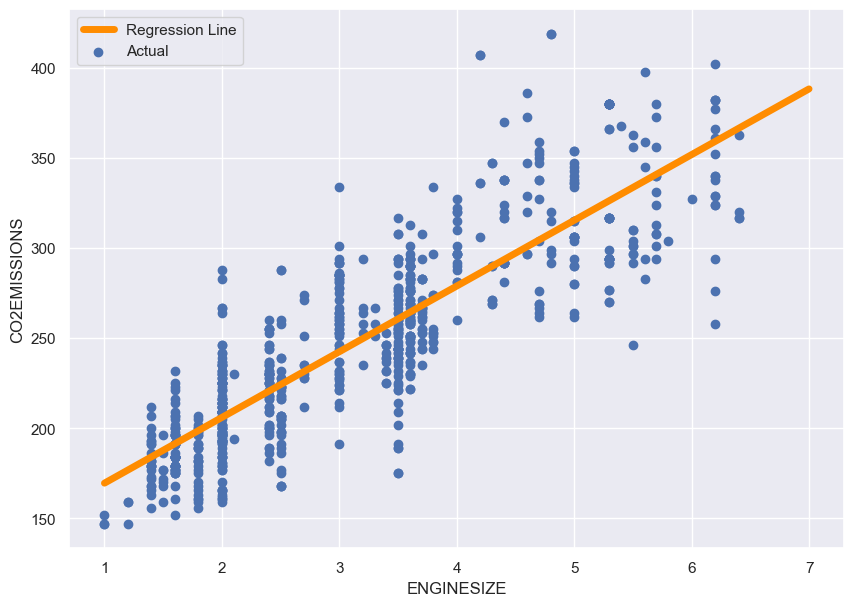

In [69]:
raihan = visualization(x_train[['ENGINESIZE']],y_train,dummy_x,ypred,"ENGINESIZE")
raihan.visualize()

### ON CYLINDERS

In [70]:
evaluator.evaluate(model,x_train[['CYLINDERS']],y_train)

MAE ::  23.2029
MSE ::  863.7845
R2 ::  71.6140


array([ 23.20294535, 863.78453173,  71.61404349])

In [71]:
x_train[['CYLINDERS']].describe().T

,count,mean,std,min,25%,50%,75%,max
CYLINDERS,779.0,5.573813,1.557182,3.0,4.0,6.0,6.0,8.0


In [72]:
dummy_x = np.linspace(3, 8, 200)
dummy_x = dummy_x.reshape(-1,1) # -1 = row , 1 = columns
dummy_x

array([[3.        ],
       [3.02512563],
       [3.05025126],
       [3.07537688],
       [3.10050251],
       [3.12562814],
       [3.15075377],
       [3.1758794 ],
       [3.20100503],
       [3.22613065],
       [3.25125628],
       [3.27638191],
       [3.30150754],
       [3.32663317],
       [3.35175879],
       [3.37688442],
       [3.40201005],
       [3.42713568],
       [3.45226131],
       [3.47738693],
       [3.50251256],
       [3.52763819],
       [3.55276382],
       [3.57788945],
       [3.60301508],
       [3.6281407 ],
       [3.65326633],
       [3.67839196],
       [3.70351759],
       [3.72864322],
       [3.75376884],
       [3.77889447],
       [3.8040201 ],
       [3.82914573],
       [3.85427136],
       [3.87939698],
       [3.90452261],
       [3.92964824],
       [3.95477387],
       [3.9798995 ],
       [4.00502513],
       [4.03015075],
       [4.05527638],
       [4.08040201],
       [4.10552764],
       [4.13065327],
       [4.15577889],
       [4.180

In [73]:
ypred = model.predict(dummy_x)

MAE ::  23.2029
MSE ::  863.7845
R2 ::  71.6140


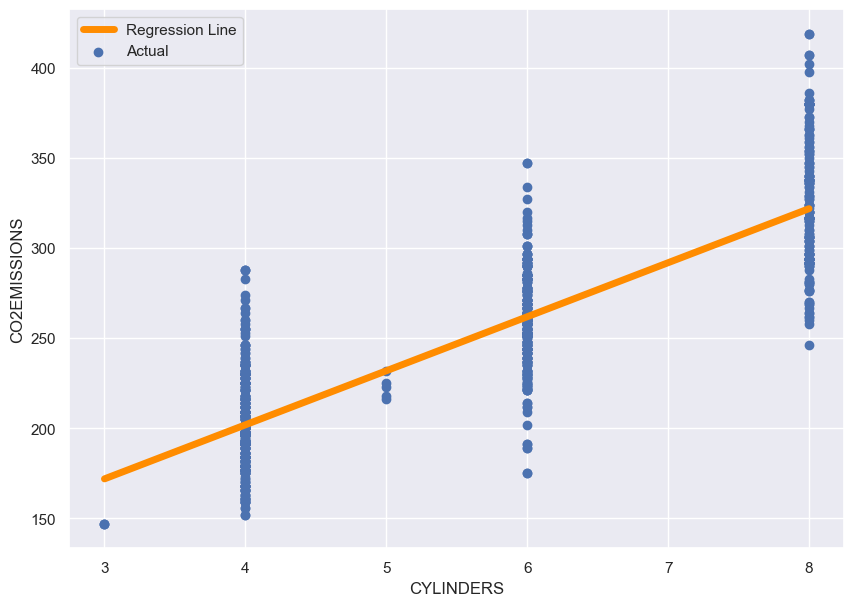

In [74]:
evaluator.evaluate(model,x_train[['CYLINDERS']],y_train)
raihan = visualization(x_train[['CYLINDERS']],y_train,dummy_x,ypred,"CYLINDERS")
raihan.visualize()

# Multiple Linear regression

In [75]:
scores.sort_values(by=0,ascending=False,inplace = True)
scores

,0
FUELCONSUMPTION_COMB,4.088892
FUELCONSUMPTION_COMB_MPG,2.908952
FUELCONSUMPTION_CITY,2.138975
FUELCONSUMPTION_HWY,1.587947
ENGINESIZE,0.982349
CYLINDERS,0.651813


In [76]:
feature_name = scores.index[::2][::2]
feature_name

Index(['FUELCONSUMPTION_COMB', 'ENGINESIZE'], dtype='object')

In [77]:
x_train[feature_name]

,FUELCONSUMPTION_COMB,ENGINESIZE
171,11.1,3.0
795,8.0,1.6
260,6.9,1.2
281,10.5,3.6
86,9.6,3.0
...,...,...
732,13.2,4.7
644,12.4,3.0
804,8.3,1.6
437,16.5,5.3


In [78]:
model_2 = LinearRegression()
model_2.fit(x_train[feature_name],y_train)

LinearRegression()

In [79]:
evaluator.evaluate(model,x_train[['FUELCONSUMPTION_COMB']],y_train)

MAE ::  14.1026
MSE ::  549.1554
R2 ::  81.9535


array([ 14.1025897 , 549.15540157,  81.95348403])

In [80]:
evaluator.evaluate(model_2,x_train[feature_name],y_train)

MAE ::  13.6028
MSE ::  447.4349
R2 ::  85.2963


array([ 13.60278983, 447.43485648,  85.29625629])

In [81]:
evaluator.evaluate(model_2,x_test[feature_name],y_test)

MAE ::  12.2406
MSE ::  389.6506
R2 ::  86.0762


array([ 12.24061421, 389.65056669,  86.07624955])

In [97]:
dummy_x1 = np.linspace(3, 8, 200).reshape(-1,1)
dummy_x2 = np.linspace(3, 8, 200).reshape(-1,1)

In [98]:
dummy = np.c_[dummy_x1,dummy_x2]
dummy

array([[3.        , 3.        ],
       [3.02512563, 3.02512563],
       [3.05025126, 3.05025126],
       [3.07537688, 3.07537688],
       [3.10050251, 3.10050251],
       [3.12562814, 3.12562814],
       [3.15075377, 3.15075377],
       [3.1758794 , 3.1758794 ],
       [3.20100503, 3.20100503],
       [3.22613065, 3.22613065],
       [3.25125628, 3.25125628],
       [3.27638191, 3.27638191],
       [3.30150754, 3.30150754],
       [3.32663317, 3.32663317],
       [3.35175879, 3.35175879],
       [3.37688442, 3.37688442],
       [3.40201005, 3.40201005],
       [3.42713568, 3.42713568],
       [3.45226131, 3.45226131],
       [3.47738693, 3.47738693],
       [3.50251256, 3.50251256],
       [3.52763819, 3.52763819],
       [3.55276382, 3.55276382],
       [3.57788945, 3.57788945],
       [3.60301508, 3.60301508],
       [3.6281407 , 3.6281407 ],
       [3.65326633, 3.65326633],
       [3.67839196, 3.67839196],
       [3.70351759, 3.70351759],
       [3.72864322, 3.72864322],
       [3.

In [99]:
pred = model_2.predict(dummy)
pred

array([143.74820189, 144.43468904, 145.12117619, 145.80766334,
       146.49415049, 147.18063764, 147.86712479, 148.55361194,
       149.24009909, 149.92658624, 150.61307339, 151.29956054,
       151.98604769, 152.67253484, 153.35902199, 154.04550914,
       154.73199629, 155.41848344, 156.10497059, 156.79145774,
       157.47794489, 158.16443204, 158.85091919, 159.53740634,
       160.22389349, 160.91038064, 161.59686779, 162.28335494,
       162.96984209, 163.65632924, 164.34281639, 165.02930354,
       165.71579069, 166.40227784, 167.08876499, 167.77525214,
       168.46173929, 169.14822643, 169.83471358, 170.52120073,
       171.20768788, 171.89417503, 172.58066218, 173.26714933,
       173.95363648, 174.64012363, 175.32661078, 176.01309793,
       176.69958508, 177.38607223, 178.07255938, 178.75904653,
       179.44553368, 180.13202083, 180.81850798, 181.50499513,
       182.19148228, 182.87796943, 183.56445658, 184.25094373,
       184.93743088, 185.62391803, 186.31040518, 186.99

<IPython.core.display.Javascript object>


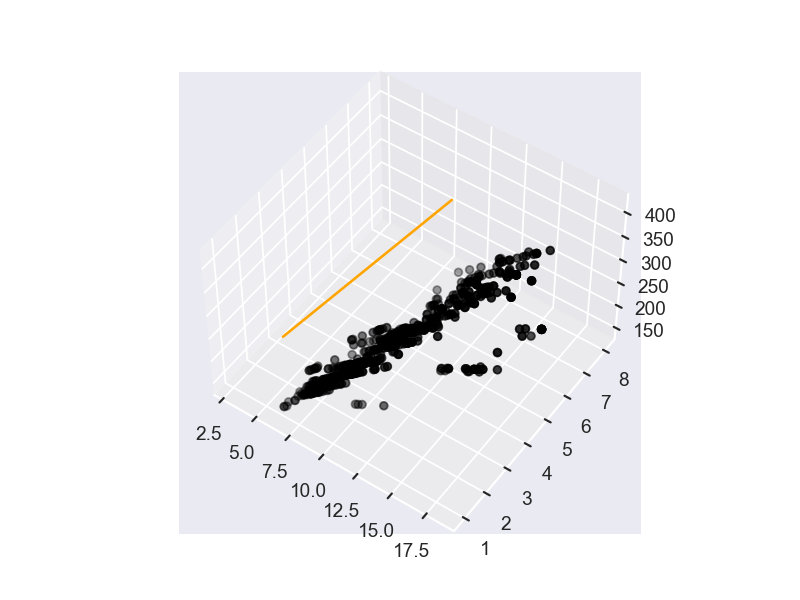

In [105]:
axes = plt.axes(projection='3d')
axes.scatter3D(
    x_train[feature_name[0]],
    x_train[feature_name[1]],
    y_train,
    label = 'Actual Data',
    color = 'black'
)

axes.plot3D(
    dummy[:,0],
    dummy[:,1],
    pred,
    label = 'Regession Line',
    color = 'orange'
)